In [1509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Intercalibrazione

In [1510]:
PATH="../Dati/InterCalibrazione - Foglio1.csv"  #importo il file con la calibrazione
data=pd.read_csv(PATH, sep=',', decimal=',')
display(data)
#Ch=np.array(data["12 aprile"])       #indice del canale 
peak_centers=np.array(data["val"])     #posizioni dei picchi
peak_err_stat=np.array(data["err_stat"])      #errori stocastici sulla posizione dei picchi
peak_err_sist=np.array(data["err_sist [pC]"])
peak_err=np.sqrt(peak_err_stat**2 + (0.34*peak_err_sist)**2)


,12 aprile,val,err_stat,err_sist [pC]
0,0,-309.82201,0.077,1.20
1,1,NaN,NaN,NaN
2,2,-330.64100,0.088,1.60
3,3,-319.28000,0.140,1.90
4,4,-295.11100,0.070,0.60
5,5,-295.76800,0.081,1.10
6,6,-284.11000,0.100,1.90
7,7,-339.05600,0.062,1.20
8,8,-311.56600,0.075,1.30
9,9,-286.21000,0.220,7.00


In [1511]:
channel_ref=15

In [1512]:
coeff_cal=peak_centers/peak_centers[channel_ref]
coeff_err=peak_err/peak_centers[channel_ref]
coeff_err[channel_ref]=0
print(coeff_cal)
print(coeff_err)

[0.98250146        nan 1.04852223 1.01249445 0.93585019 0.93793366
 0.90096404 1.07520771 0.98803197 0.90762352 1.20488996 0.9258578
        nan        nan 1.00612038 1.        ]
[-0.00131668         nan -0.00174755 -0.00209614 -0.00068395 -0.00121352
 -0.00207298 -0.0013087  -0.0014217  -0.00757959 -0.00437405 -0.00043782
         nan         nan -0.00073219  0.        ]


In [1513]:
list=[0,1,2,3,4,5,6,7,8,9, 10,11,14,15]
#list=[0, 3, 5, 6, 7, 10, 15] #commentare per vedere tutto, scommentare per vedere quelli belli
train_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(train_peak_centers)
train_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])

print(train_peak_centers)
print(train_peak_errors)


[-315.34     nan -315.34 -315.34 -315.34 -315.34 -315.34 -315.34 -315.34
 -315.34 -315.34 -315.34 -315.34 -315.34]
[-315.34     nan -315.34 -315.34 -315.34 -315.34 -315.34 -315.34 -315.34
 -315.34 -315.34 -315.34 -315.34 -315.34]
[0.59764268        nan 0.74326803 0.92325426 0.32591912 0.57699
 1.02608212 0.54280039 0.6416972  3.72420662 1.61893699 0.21088396
 0.3245377  0.24257164]


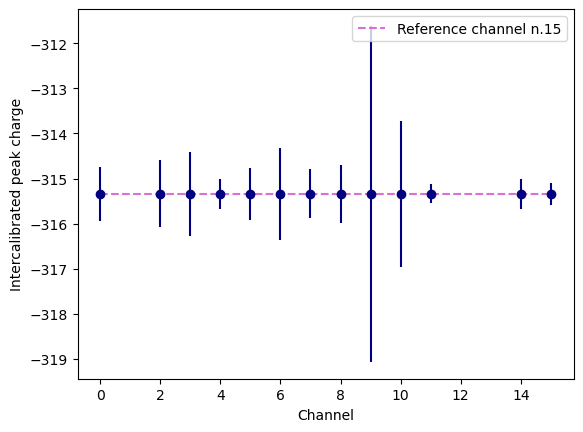

In [1514]:
#plot
plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', marker='o', color='navy')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='orchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()

##  Test

In [1515]:
PATH="../Dati/InterCalibrazione - Test.csv"  #importo il file con i nuovi picchi da verificare
data=pd.read_csv(PATH, sep=',', decimal=',')
display(data)
#Ch=np.array(data["ch"])       #indice del canale 
peak_centers=np.array(data["val"])     #posizioni dei picchi
peak_err_stat=np.array(data["err_stat"])      #errori stocastici sulla posizione dei picchi

peak_err_sist=np.array(data["err_sist"])
peak_err=np.sqrt(peak_err_stat**2 + peak_err_sist**2)


###########################################################################
test_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(test_peak_centers)
test_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])

print(test_peak_errors)


,ch,val,err_stat,err_sist
0,0,-310.39,0.12,1.00
1,1,NaN,NaN,NaN
2,2,-337.12,0.17,2.00
3,3,-320.46,0.20,3.00
4,4,-291.91,0.15,0.60
5,5,-297.34,0.13,1.00
6,6,-278.20,0.20,3.00
7,7,-343.15,0.12,2.00
8,8,-317.29,0.12,1.00
9,9,-262.04,0.83,10.00


[-315.91810601           nan -321.51917276 -316.50543849 -311.91958077
 -317.01602472 -308.78035972 -319.14763638 -321.13333483 -288.71001572
 -313.44771101 -320.22195917 -321.82033788 -315.58      ]
[ 1.10909823         nan  1.987912    3.04098997  0.69907187  1.15072562
  3.41194548  1.90350845  1.11921663 11.31551463  3.51372759  0.5990847
  0.5396726   1.49281613]


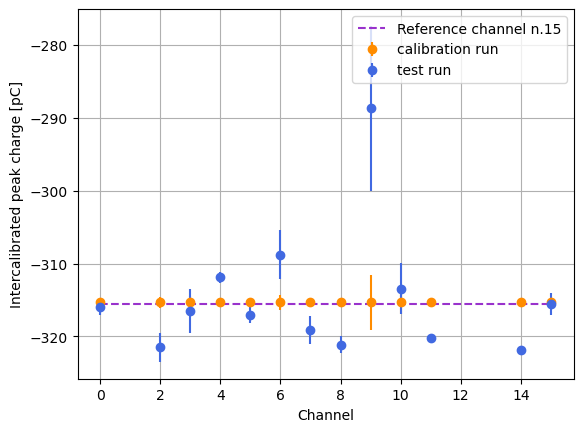

In [1516]:
#plot
plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', marker='o', color='darkorange', label= 'calibration run')
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', marker='o', color='royalblue', label='test run')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='darkorchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
#plt.plot(list, test_peak_centers-peak_centers[channel_ref]/test_peak_errors, ls='', marker='o', color='red', label='sigma units')
#plt.ylim(peak_centers[channel_ref]-50, peak_centers[channel_ref]+50)
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge [pC]')
plt.legend()


#plot in kev
    

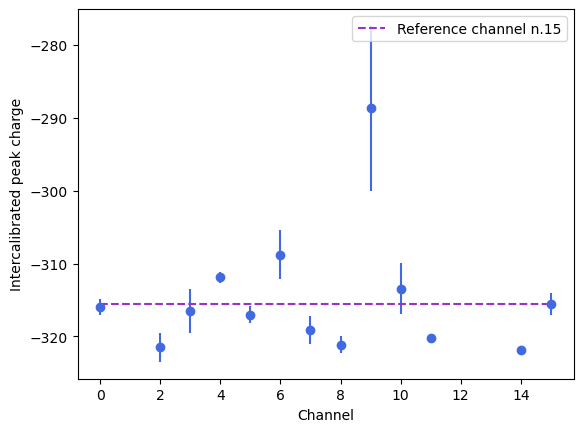

In [1517]:
#plot con train e test insieme
#plot
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', marker='o', color='royalblue')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='darkorchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()
    

In [1518]:
#0, 3, 5, 7, 10, 15
nice_channels=[0, 3, 5, 7, 10, 15]

# Picchi all together train

In [1519]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values


def rebin(data, factor):
    if len(data) % factor != 0:
        raise ValueError("Length of data must be divisible by factor.")
    rebinned_data = np.sum(data.reshape(-1, factor), axis=1)
    return rebinned_data

In [1520]:
PATH_MARTI="../Dati/Run_chall_ChargeHistos_4_12_2024_10M.dat"
#PATH_SAM="../Dati/12_APR/Run_chall_ChargeHistos_4_12_2024_10M.dat"
edge_N_all, bin_N_all = load_histo(PATH_MARTI)

channel = 0

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 11, 12]

    
edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


Text(0, 0.5, 'counts')

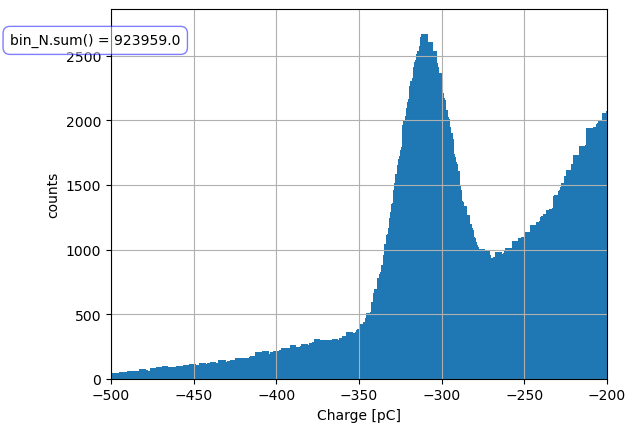

In [1521]:
lim_list = [[-500, -200],  #ch0
                [-1, -1],  #ch1
                [-360, -300],  #ch2
                [-350, -280],  #ch3
                [-320, -263],  #ch4
                [-320, -270],  #ch5
                [-310, -250],  #ch6
                [-365, -310],  #ch7
                [-335, -280],  #ch8
                [340, 470],  #ch9
                [-409, -340],  #ch10
                [-318, -255],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-350, -280],  #ch14
                [-340, -290]   #ch15
                ]

lim_N = lim_list[channel]
plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

2898.0


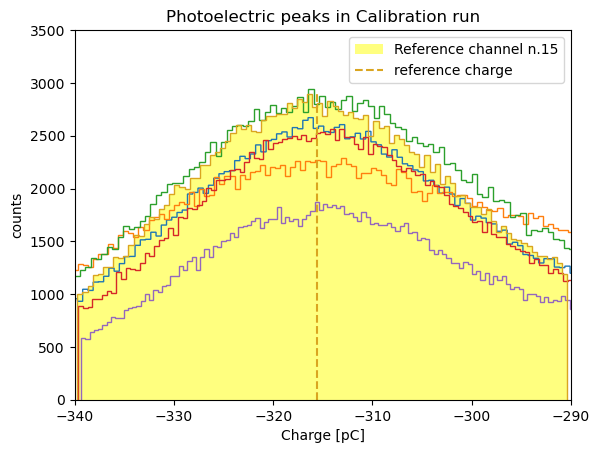

In [1522]:
for ch in nice_channels:

    lim_N=lim_list[ch]
    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]
    centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
    edge_N=edge_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

    #sfrutto la ricalibrazione per spostare i picchi

    if(ch!=channel_ref):
        #plt.bar(centers_N/coeff_c
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False)
    else:
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, color='yellow', alpha=0.5, label ='Reference channel n.{}'.format(channel_ref))
        counts,b,p=plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False, edgecolor='goldenrod')
        plt.vlines(x=peak_centers[channel_ref], ymin=0, ymax=np.max(counts), linestyle='--', linewidth=1.5, color='goldenrod', label='reference charge')
        print(np.max(counts))

plt.xlim(-340, -290)
plt.ylim(0, 3500)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")
plt.title('Photoelectric peaks in Calibration run')
plt.legend()





   

# Picchi all together test

In [1523]:
PATH_MARTI="../Dati/Run_allch_TEST_7M_4_12_2024.dat"
#PATH_SAM="../Dati/12_APR/Run_chall_ChargeHistos_4_12_2024_10M.dat"
edge_N_all, bin_N_all = load_histo(PATH_MARTI)

channel = 15

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 11, 12]

    
edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


Text(0, 0.5, 'counts')

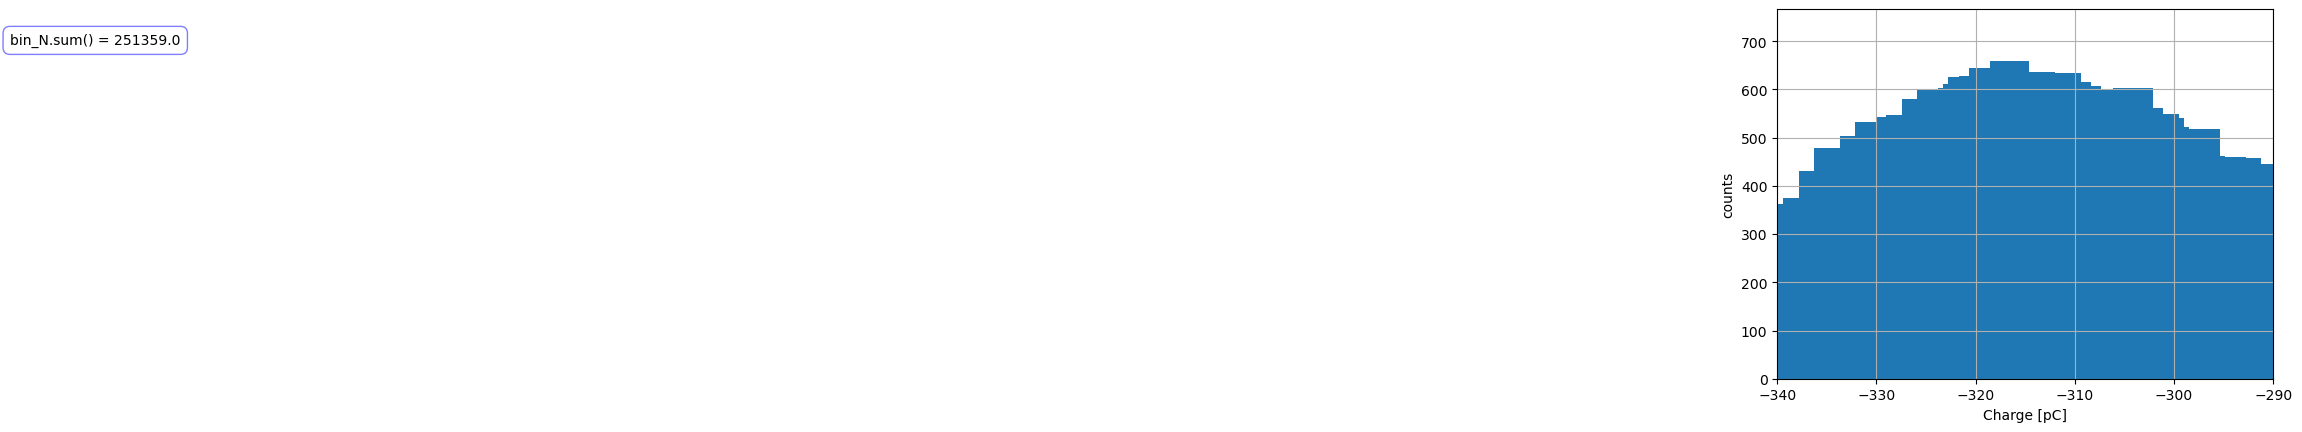

In [1524]:
lim_list = [[-335, -285],  #ch0
                [-1, -1],  #ch1
                [-360, -300],  #ch2
                [-355, -285],  #ch3
                [-320, -263],  #ch4
                [-320, -270],  #ch5
                [-310, -250],  #ch6
                [-365, -315],  #ch7
                [-335, -280],  #ch8
                [340, 470],  #ch9
                [-410, -350],  #ch10
                [-318, -255],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-350, -280],  #ch14
                [-340, -290]   #ch15
                ]

lim_N = lim_list[channel]
plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

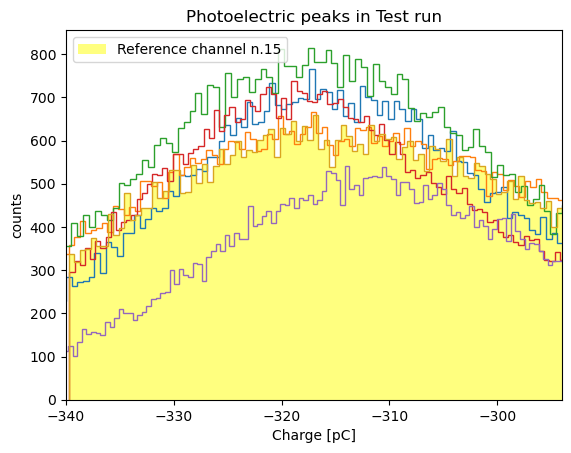

In [1525]:
for ch in nice_channels:

    lim_N=lim_list[ch]
    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]
    centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
    edge_N=edge_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

    #sfrutto la ricalibrazione per spostare i picchi

    if(ch!=channel_ref):
        #plt.bar(centers_N/coeff_c
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False)
    else:
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, color='yellow', alpha=0.5, label ='Reference channel n.{}'.format(channel_ref))
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False, edgecolor='goldenrod')

plt.xlim(-340, -294)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")
plt.title('Photoelectric peaks in Test run')
plt.legend()





   